Matplotlib is building the font cache; this may take a moment.


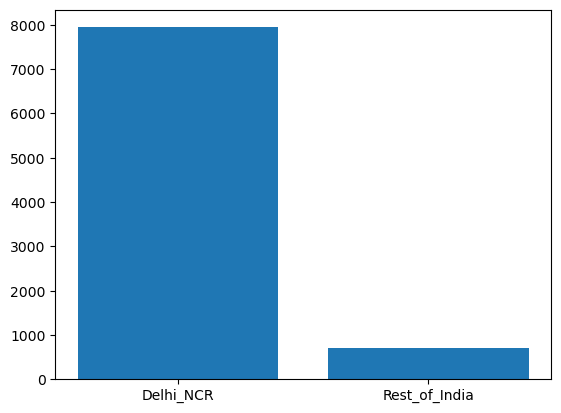

In [1]:
"""
The dataset is highly skewed toward the cities included in Delhi-NCR. 
So, we will summarise all the other cities in Rest of India while those in New Delhi, 
Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our 
analysis turn toward Delhi-NCR v Rest of India.

1. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

Answer : First I have filtered out all countries which is not having Country Code as 1.
Next I have made one set wherein I kept all the cities which are in Delhi-NCR which will help me to segregate. Next
thing I have done I have made one dictionary wherein I kept two keys, first one as Delhi_NCR and and second one as
Rest_of_India. Initially both of them are zero values. I have applied one function that is get_city which is helping me
to store the count. Inside the function I am checking whether city value present in the set if that is present, it means
that will count undered Delhi_NCR so I update Delhi_NCR count otherwise Rest_of_India. Eventually I will get the desire 
result in the cities_group_restaurant_count dictionary. One thing I have done, I have updated the name of the cities based
on Delhi_NCR or Rest_of_India to answer further questions. Made two separate lists one for the count and one for the keys.
After that I have plot in bar graph and we can see Delhi_NCR has the ample number of restaurant as compared to Rest_of_India.

"""

# Packages
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load Dataset
zomato_df =  pd.read_csv("zomato_utf.csv")
# Only Indian Restaurants
zomato_df = zomato_df[zomato_df['Country Code']==1]

# Delhi-NCR cities 
delhi_ncr = {'New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad'}
# 
cities_group_restaurant_count = {'Delhi_NCR':0,'Rest_of_India':0}

def city(city_name):
    if city_name in delhi_ncr:
        cities_group_restaurant_count['Delhi_NCR']+=1
        return "Delhi_NCR"
    else:
        cities_group_restaurant_count['Rest_of_India']+=1
        return "Rest_of_India"

# Update city_name with group name for future use.
zomato_df_with_group_city = zomato_df.copy()
zomato_df_with_group_city['City'] = zomato_df_with_group_city['City'].apply(city)


group_name = []
restaurant_count = []
for key,value in cities_group_restaurant_count.items():
    group_name.append(key)
    restaurant_count.append(value)


plt.bar(group_name,restaurant_count)
plt.xticks(rotation=0)
plt.show()




In [2]:
"""
2. Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.
Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR 
or just it due to incomplete dataset.

Answer : With given dataset I have found four cuisine names where are not present in Delhi-NCR restaurants and they are
German Cajun Malwani BBQ but after checking with Zomato API I have found that some of them are present in Delhi-NCR
restaurants. So dataset have some missing data. 

NOTE: Combined Column is City_Cuisines from which I have figured out the data. And this column has been used for further questions. 

"""
zomato_df_with_group_city["City_Cuisines"] = zomato_df_with_group_city['City'] + "###" + zomato_df_with_group_city['Cuisines']

# Store cuisines depending on their city 
restaurant_cuisines = set()
delhi_ncr_cuisines = set()

def city_cuisines(cuisines):
    city = cuisines.split("###")[0]
    cuisines = cuisines.split("###")[1].split(", ")
    if city=="Delhi_NCR":
        for cuisine in cuisines:
            delhi_ncr_cuisines.add(cuisine)
    else:
        for cuisine in cuisines:
            restaurant_cuisines.add(cuisine)
    return cuisines
            

zomato_df_with_group_city["City_Cuisines"].apply(city_cuisines)

cuisines_not_in_delhi_ncr = []
for cuisine in restaurant_cuisines:
    if cuisine in delhi_ncr_cuisines:
        continue
    else:
        cuisines_not_in_delhi_ncr.append(cuisine)


# Cuisines not in Delhi_NCR
print(*cuisines_not_in_delhi_ncr)
        
        
# Verify with zomato's actual data
headers = {'user-key': '1916a1cbf9ae3cca094d599c14b5bd23'}
url = "https://developers.zomato.com/api/v2.1/cuisines?city_id=1"
response = requests.get(url,headers=headers)
cuisines = response.json()['cuisines']

# Indicates whether cuisine present in Delhi-NCR or not
check_present = False
for cuisine in cuisines:
    if cuisine['cuisine']['cuisine_name'] in cuisines_not_in_delhi_ncr:
        check_present = True
        break
    
# True indicates dataset has missing values. False indicates there is no missing values.     
print(check_present)



Malwani BBQ Cajun German


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
"""
3. Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

Answer: I have made one dictionary named cuisines_with_count wherein cuisine name works as the key and value is 
the count. I have made function inside which I am storing the the count for each cuisines depending upon their occurrence.
Once I got the values filled in the dictionary I have made one list of list and 0th column is for count and 1st column
is for the cuisine name. I have sorted the list based on the count and then I picked top 10. I after ploting on the
graph we can see the list as below.

Top ten cuisines that are being servered in Delhi-NCR and Rest of India are 
a. North Indian
b. Chinese
c. Fast Food
d. Mughlai
e. Bakery
f. Contental
g. Italian
h. South Indian
i. Cafe
j. Desserts
"""

cuisines_with_count = {}

def get_cuisines(cuisines):
#     print(type(cuisines))
    list_cuisines = cuisines.split(", ")
    for cuisine in list_cuisines:
        cuisines_with_count[cuisine] = cuisines_with_count.get(cuisine,0)+1

zomato_df_with_group_city['Cuisines'].apply(get_cuisines)
cuisine_name_count = []
for key,value in cuisines_with_count.items():
    cuisine_name_count.append([value,key])

cuisine_name_count.sort(reverse = True)


cuisines = [ i[1] for i in cuisine_name_count[:10]]
counts = [ i[0] for i in cuisine_name_count[:10]]

plt.bar(cuisines,counts)
plt.xticks(rotation=45)
plt.xlabel("Cuisines",size = 15)
plt.ylabel("Count", size = 15)
plt.show()


In [ ]:
"""
4. Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India.
Plot the suitable graph to explain your inference.

Answer : From the graph we can see that North Indian, Chinese Cuisine are servered most in both places. But number of
restaurants serves has a huge difference, North Indian cuisinse is served by more than 3500 restaurants in Delhi NCR
but this data changes drastically in Rest of India, and that is only 350 or so and same goes for Chinese cuisine. 
Third most servered cuisine in Delhi NCR is Fast Food wherein Rest India is Continental and there is some order difference
in terms of restaurant serves. There are total 86 different cuisines that are offered in Delhi-NCR wherein Rest India offers
70 different cuisines.
NOTE: Here I have made an column by combining two columns as mentioned earlier. 
"""

delh_ncr_cuisines_with_count = {}
rest_of_india_cuisines_with_count = {}

# Note : I could have used city_cuisines with little altercation inside but as I am following moduler code quality so 
# I will be creating another function which will only work for this particular question. 




def city_cuisines_with_count(city_cuisines):
    city = city_cuisines.split("###")[0]
    list_cuisines = city_cuisines.split("###")[1].split(", ")
    if city=="Delhi_NCR":
        for cuisine in list_cuisines:
            delh_ncr_cuisines_with_count[cuisine] = delh_ncr_cuisines_with_count.get(cuisine,0)+1
    else:
        for cuisine in list_cuisines:
            rest_of_india_cuisines_with_count[cuisine] = rest_of_india_cuisines_with_count.get(cuisine,0)+1
            
zomato_df_with_group_city["City_Cuisines"].apply(city_cuisines_with_count)


no_of_cuisines_in_delhi_ncr = len(delh_ncr_cuisines_with_count)
no_of_cuisines_in_rest_india = len(rest_of_india_cuisines_with_count)
print("Delhi-NCR ",no_of_cuisines_in_delhi_ncr)
print("Rest India ",no_of_cuisines_in_rest_india)

delhi_ncr_cuisine_with_count = [[value,key] for key,value in delh_ncr_cuisines_with_count.items()]
rest_india_cuisine_with_count = [[value,key] for key,value in rest_of_india_cuisines_with_count.items()]

delhi_ncr_cuisine_with_count.sort(reverse = True)
rest_india_cuisine_with_count.sort(reverse = True)

delhi_ncr_cuisine = [ i[1] for i in delhi_ncr_cuisine_with_count][:20]
delhi_ncr_count = [ i[0] for i in delhi_ncr_cuisine_with_count][:20]
rest_india_cuisine = [ i[1] for i in rest_india_cuisine_with_count][:20]
rest_india_count = [ i[0] for i in rest_india_cuisine_with_count][:20]


plt.plot(delhi_ncr_cuisine,delhi_ncr_count,c="r")
plt.xticks(rotation=90)
plt.xlabel("Cuisines", size = 15)
plt.ylabel("No of Restaurant Serves", size = 12)
plt.show()

plt.plot(rest_india_cuisine,rest_india_count,c="b")
plt.xticks(rotation=90)
plt.xlabel("Cuisines", size = 15)
plt.ylabel("No of Restaurant Serves", size = 12)
plt.show()
# print(delhi_ncr_cuisine_with_count)
# print(rest_india_cuisine_with_count)
